In [1]:
# import relevant modules
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# load 2019 taxi trip data collected by NYC Taxi and Limousine Commission (TLC) into a pandas dataframe
taxis = sn.load_dataset("taxis")

In [24]:
# take a look at the dataset
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


How many rows?

In [25]:
taxis.shape[0]

6433

How many columns?

In [26]:
taxis.shape[1]

14

How many missing values in each column?

In [27]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

What is the average distance traveled by the taxi trips in this dataset?

In [28]:
taxis["distance"].mean()

3.024616819524328

Create a histogram to visualize the distribution of distances.

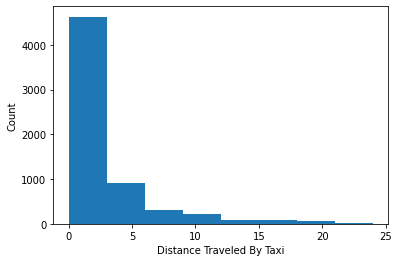

In [ ]:
plt.hist(taxis["distance"], bins = np.arange(0, 25, 3))
plt.xlabel("Distance Traveled By Taxi")
plt.ylabel("Count")
plt.show()

What do notice you about the shape of the distribution given the histogram above?

The distribution is skewed to the right, with a peak at the left and a long tail at the right. This indicates that the mean distance is greater than the median distance, and shorter distances are more frequent.

Create a scatterplot to visualize total cost of taxi trip over distance traveled.

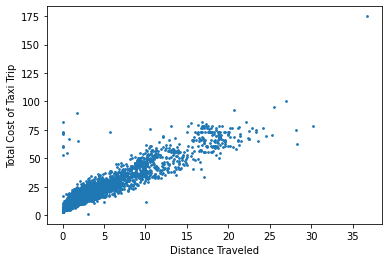

In [76]:
plt.scatter(x = taxis["distance"], y = taxis["total"], s = 3)
plt.xlabel("Distance Traveled")
plt.ylabel("Total Cost of Taxi Trip")
plt.show()

What trend do you see in the scatterplot?

There seems to be a positive association between distance traveled and total cost of taxi trip. Taxi trips that cover longer distances cost more. 

Drop the rows where there is a missing value in the "payment" column.

In [29]:
taxis = taxis.loc[taxis["payment"].notna(), :]

Confirm that there are no missing values in the "payment" column now.

In [31]:
taxis["payment"].isna().sum()

0

What are the different forms of payment?

In [32]:
taxis["payment"].unique()

array(['credit card', 'cash'], dtype=object)

Create a countplot to visualize how many taxi trips were payed for via each form of payment.

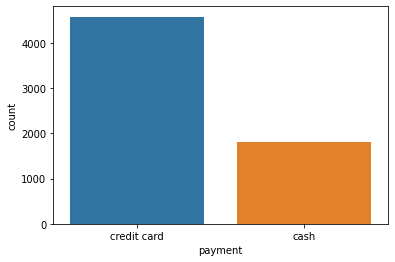

In [38]:
sn.countplot(x = "payment", data = taxis)
plt.show()

From the visualization, what can you tell about the distribution of taxi trips across payment form?

Over twice as many taxi trips were payed for via credit card than via cash.

How many taxi trips were payed for via each form of payment?

In [39]:
taxis["payment"].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

Drop rows where there is a missing value in the "pickup_borough" column.

In [52]:
taxis = taxis.loc[taxis["pickup_borough"].notna(), :]

Confirm that there are no missing values in the "pickup_borough" column now.

In [53]:
taxis["pickup_borough"].isna().sum()

0

What are the different boroughs from which taxi pickups occur according to the dataset?

In [94]:
taxis["pickup_borough"].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

Create a countplot to visualize the distribution of taxi pickups across borough.

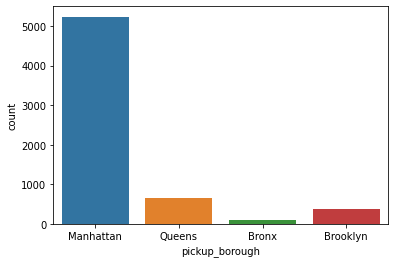

In [43]:
sn.countplot(x = "pickup_borough", data = taxis)
plt.show()

Drop rows where there is a missing value in the "dropoff_borough" column.

In [54]:
taxis = taxis.loc[taxis["dropoff_borough"].notna(), :]

Confirm that there are no missing values in the "dropoff_borough" column now.

In [55]:
taxis["dropoff_borough"].isna().sum()

0

How many taxi trips did dropoffs in each borough?

In [45]:
taxis["dropoff_borough"].value_counts()

Manhattan    5236
Queens        649
Brooklyn      380
Bronx          99
Name: pickup_borough, dtype: int64

What are the different boroughs from which taxi dropoffs occur according to the dataset?

In [93]:
taxis["dropoff_borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

Create a countplot to visualize the distribution of taxi dropoffs across borough.

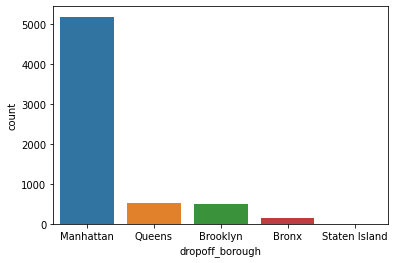

In [44]:
sn.countplot(x = "dropoff_borough", data = taxis)
plt.show()

How many taxi trips did dropoffs in each borough?

In [46]:
taxis["dropoff_borough"].value_counts()

Manhattan        5176
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: dropoff_borough, dtype: int64

Create a subset that only includes taxi trips that picked up passengers in the Brooklyn borough. 

In [69]:
brooklyn_pickup = taxis.loc[taxis["pickup_borough"] == "Brooklyn", :]

Take a look at the subset.

In [70]:
brooklyn_pickup

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
114,2019-03-05 12:17:49,2019-03-05 12:36:12,1,5.98,19.00,5.58,0.0,27.88,yellow,credit card,Brooklyn Heights,Murray Hill,Brooklyn,Manhattan
155,2019-03-21 22:49:32,2019-03-21 22:55:11,1,1.03,6.00,1.46,0.0,8.76,yellow,credit card,DUMBO/Vinegar Hill,Brooklyn Heights,Brooklyn,Brooklyn
214,2019-03-22 22:40:19,2019-03-22 22:55:26,1,2.75,12.50,0.00,0.0,13.80,yellow,cash,Stuyvesant Heights,Crown Heights North,Brooklyn,Brooklyn
266,2019-03-26 21:42:29,2019-03-26 22:05:23,2,4.40,17.50,3.76,0.0,22.56,yellow,credit card,Fort Greene,Cypress Hills,Brooklyn,Brooklyn
332,2019-03-16 01:14:24,2019-03-16 01:26:45,1,2.60,11.00,0.00,0.0,12.30,yellow,cash,Crown Heights North,Crown Heights South,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,2019-03-24 09:07:15,2019-03-24 09:36:45,6,10.23,33.00,0.00,0.0,33.80,green,credit card,East Flatbush/Farragut,South Ozone Park,Brooklyn,Queens
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.0,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.00,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.00,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


How many rows in the subset?

In [71]:
brooklyn_pickup.shape[0]

378

How many columns in the subset?

In [72]:
brooklyn_pickup.shape[1]

14

What are the pickup zones in the pickup borough Brooklyn in order of most taxi trips to least taxi trips, along with the corresponding counts?

In [78]:
brooklyn_pickup_counts = brooklyn_pickup["pickup_zone"].value_counts()

In [80]:
brooklyn_pickup_counts

Fort Greene                     39
Downtown Brooklyn/MetroTech     37
Brooklyn Heights                34
Park Slope                      22
Boerum Hill                     20
Williamsburg (North Side)       15
DUMBO/Vinegar Hill              15
Crown Heights North             12
Williamsburg (South Side)       11
Cobble Hill                     11
East New York                    9
Greenpoint                       9
Bushwick South                   9
Sheepshead Bay                   8
Stuyvesant Heights               8
East Flatbush/Farragut           7
Carroll Gardens                  7
Clinton Hill                     7
Coney Island                     6
Midwood                          6
Starrett City                    6
East Flatbush/Remsen Village     6
East Williamsburg                5
Bushwick North                   5
Flatbush/Ditmas Park             4
Brownsville                      4
Prospect-Lefferts Gardens        4
Gravesend                        4
Erasmus             

What are the pickup zones with the 5 highest counts?

In [81]:
zones = brooklyn_pickup_counts.iloc[0:5]

In [82]:
zones

Fort Greene                    39
Downtown Brooklyn/MetroTech    37
Brooklyn Heights               34
Park Slope                     22
Boerum Hill                    20
Name: pickup_zone, dtype: int64

Create a subset for taxi trips involving pickup in any of the 5 zones identified above.

In [84]:
brooklyn_pickup_5 = brooklyn_pickup.loc[brooklyn_pickup["pickup_zone"].apply(lambda zone: zone in zones), :]

In [85]:
brooklyn_pickup_5

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
114,2019-03-05 12:17:49,2019-03-05 12:36:12,1,5.98,19.00,5.58,0.00,27.88,yellow,credit card,Brooklyn Heights,Murray Hill,Brooklyn,Manhattan
266,2019-03-26 21:42:29,2019-03-26 22:05:23,2,4.40,17.50,3.76,0.00,22.56,yellow,credit card,Fort Greene,Cypress Hills,Brooklyn,Brooklyn
694,2019-03-13 11:12:11,2019-03-13 11:47:17,1,7.00,28.50,6.35,0.00,38.15,yellow,credit card,Brooklyn Heights,Midtown East,Brooklyn,Manhattan
1218,2019-03-08 09:46:36,2019-03-08 10:25:44,1,17.09,49.50,0.00,5.76,56.06,yellow,credit card,Boerum Hill,Soundview/Castle Hill,Brooklyn,Bronx
1221,2019-03-07 18:56:16,2019-03-07 19:19:42,1,4.10,18.50,0.00,0.00,22.80,yellow,cash,Park Slope,East Village,Brooklyn,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,2019-03-21 18:28:55,2019-03-21 18:51:08,2,3.88,16.50,0.00,0.00,18.30,green,cash,Boerum Hill,Ocean Hill,Brooklyn,Brooklyn
6411,2019-03-25 18:28:05,2019-03-25 18:33:30,1,1.10,6.00,1.00,0.00,8.80,green,credit card,Brooklyn Heights,Columbia Street,Brooklyn,Brooklyn
6412,2019-03-20 17:33:25,2019-03-20 17:42:48,5,1.40,8.00,0.00,0.00,9.80,green,cash,Brooklyn Heights,Fort Greene,Brooklyn,Brooklyn
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.00,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn


How many rows in this subset?

In [91]:
brooklyn_pickup_5.shape[0]

152

How many columns in this subset?

In [92]:
brooklyn_pickup_5.shape[1]

14

Create a countplot to visualize the distribution of taxi trips across the "top 5" pickup zones in pickup borough Brooklyn.

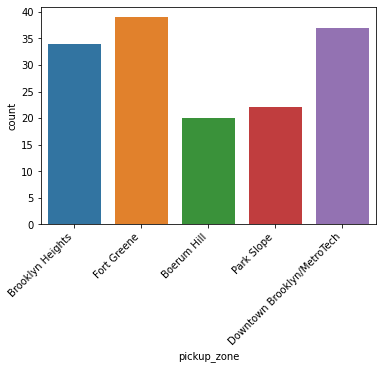

In [87]:
sn.countplot(x = "pickup_zone", data = brooklyn_pickup_5)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

What is one thing you notice from the barplot above?  

Fort Green is the pickup zone with the most number of taxi trips in Brooklyn.

Create a barplot to visualize the total cost on average across each of the "top 5" pickup zones in pickup borough Brooklyn.

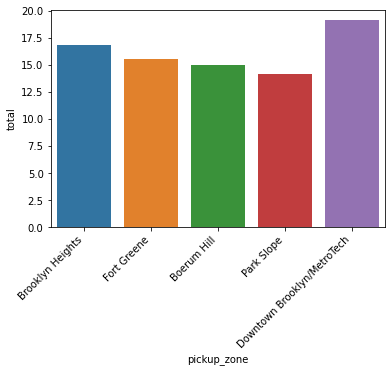

In [90]:
sn.barplot(x = "pickup_zone", y = "total", data = brooklyn_pickup_5, ci = False)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

What is one thing you notice from the barplot above?  

Downtown Brooklyn/MetroTech is the pickup zone with the highest average total cost for taxi trips in Brooklyn.